In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Harmeet Kaur\myenv\Scripts\python.exe -m pip install --upgrade pip


Connection successful!


C:\Users\Harmeet Kaur\AppData\Local\Temp\ipykernel_20144\4109245464.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query1, connection)


Average Days to First Order: 10.55
  customer_name  days_to_first_order
0       melissa                   13
1           max                   15
2         klaus                   20
3            om                   18
4         farah                   18


C:\Users\Harmeet Kaur\AppData\Local\Temp\ipykernel_20144\4109245464.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query2, connection)


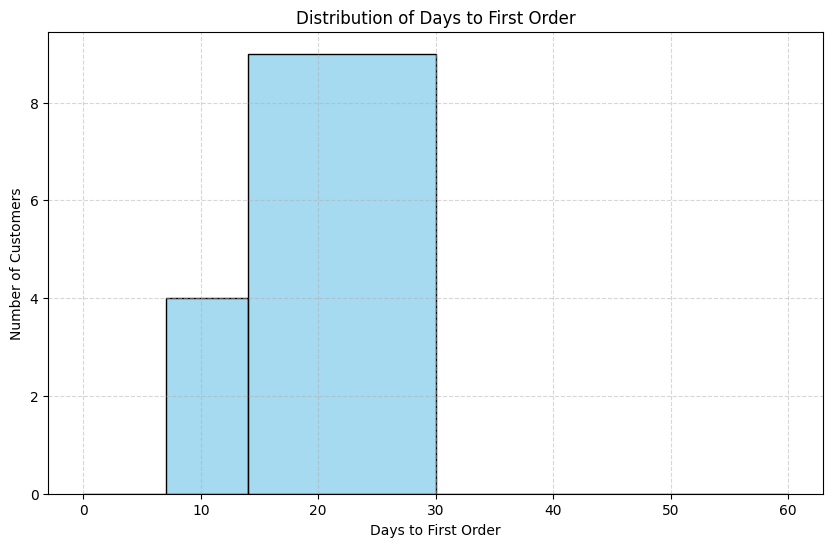

Database connection closed.


In [38]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def connect_to_mysql():
    connection = None
    try:
        connection = mysql.connector.connect(
            host="127.0.0.1",          
            user="root",               
            password="**********",  
            database="project"         
        )
        print("Connection successful!")

        query1 = """
        with first_order as (
        select order_id,
               min(registered_date) as registered_date,
               min(order_date) as first_order_date,
               datediff(min(order_date), min(registered_date)) as days_to_first_order
        from order_details
        group by order_id
        )
        select 
        avg(days_to_first_order) as avg_days_to_first_order
        from first_order;
        """

        df = pd.read_sql(query1, connection)
        print(f"Average Days to First Order: {df.iloc[0, 0]:.2f}")

        
        query2= """
        select 
        customer_name,
        datediff(min(order_date), min(registered_date)) as days_to_first_order
        from order_details
        group by customer_name;
        """

        df = pd.read_sql(query2, connection)
        print(df.head())

        plt.figure(figsize=(10, 6))
        sns.histplot(df["days_to_first_order"], bins=[0, 3, 7, 14, 30, 60], kde=False, color="skyblue", edgecolor='black')

        plt.xlabel("Days to First Order")
        plt.ylabel("Number of Customers")
        plt.title("Distribution of Days to First Order")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if connection:
            connection.close()
            print("Database connection closed.")

connect_to_mysql()